In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/bank-data.csv.gz', compression='gzip', sep=',')
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df.shape

(150000, 11)

In [10]:
for i in list(df.columns):
    print(i)

SeriousDlqin2yrs
RevolvingUtilizationOfUnsecuredLines
age
NumberOfTime30-59DaysPastDueNotWorse
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberOfTimes90DaysLate
NumberRealEstateLoansOrLines
NumberOfTime60-89DaysPastDueNotWorse
NumberOfDependents


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [18]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [21]:
df["SeriousDlqin2yrs"].value_counts()

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

In [25]:
np.mean(df["age"])

52.295206666666665

In [27]:
pd.pivot_table(df, values=['NumberOfTime30-59DaysPastDueNotWorse',
                            'NumberOfTime60-89DaysPastDueNotWorse', 
                           'NumberOfTimes90DaysLate'],
                index=['SeriousDlqin2yrs'], aggfunc=np.mean)

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
SeriousDlqin2yrs,,,
0,0.280109,0.126666,0.135225
1,2.388490,1.828047,2.091362


<AxesSubplot:>

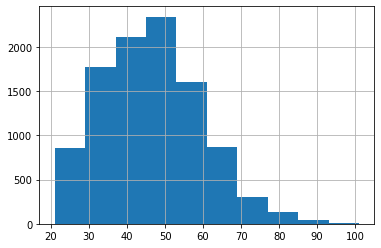

In [56]:
df[df['SeriousDlqin2yrs'] == 1]['age'].hist()

In [58]:
df["NumberOfDependents"].value_counts(normalize=True)

0.0     0.594909
1.0     0.180153
2.0     0.133643
3.0     0.064918
4.0     0.019593
5.0     0.005107
6.0     0.001082
7.0     0.000349
8.0     0.000164
9.0     0.000034
10.0    0.000034
13.0    0.000007
20.0    0.000007
Name: NumberOfDependents, dtype: float64

In [59]:
df.apply(func=max)

SeriousDlqin2yrs                              1.0
RevolvingUtilizationOfUnsecuredLines      50708.0
age                                         109.0
NumberOfTime30-59DaysPastDueNotWorse         98.0
DebtRatio                                329664.0
MonthlyIncome                           3008750.0
NumberOfOpenCreditLinesAndLoans              58.0
NumberOfTimes90DaysLate                      98.0
NumberRealEstateLoansOrLines                 54.0
NumberOfTime60-89DaysPastDueNotWorse         98.0
NumberOfDependents                           20.0
dtype: float64

In [60]:
df[df['age'] > 65]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
15,0,0.019657,76,0,477.000000,0.0,6,0,1,0,0.0
17,0,0.061086,78,0,2058.000000,NaN,10,0,2,0,0.0
28,0,0.034421,69,0,0.042383,2500.0,17,0,0,0,1.0
38,0,1.000000,75,1,0.134078,3400.0,1,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
149972,0,0.058001,83,0,0.013997,5000.0,6,0,0,0,0.0
149977,0,0.000627,76,0,60.000000,NaN,5,0,0,0,0.0
149984,0,0.002485,82,0,0.000800,5000.0,5,0,0,0,0.0
149985,0,0.037548,84,0,25.000000,NaN,5,0,0,0,0.0


In [74]:
df.groupby(by='SeriousDlqin2yrs')[['RevolvingUtilizationOfUnsecuredLines',
                                   'age', 'DebtRatio']].describe(percentiles=[])

RevolvingUtilizationOfUnsecuredLines                        \
                                                count      mean         std   
SeriousDlqin2yrs                                                              
0                                            139974.0  6.168855  256.126350   
1                                             10026.0  4.367282  131.835778   

                                               age                        \
                  min       50%      max     count       mean        std   
SeriousDlqin2yrs                                                           
0                 0.0  0.133288  50708.0  139974.0  52.751375  14.791079   
1                 0.0  0.838853   8328.0   10026.0  45.926591  12.916289   

                                    DebtRatio                                \
                   min   50%    max     count        mean          std  min   
SeriousDlqin2yrs                                                              
0                  0.0  52.0  109.0  139974.0  357.151168  2083.282060  0.0   
1                 21.0  45.0  101.0   10026.0  295.121066  1238.360283  0.0   

                                      
                       50%       max  
SeriousDlqin2yrs                      
0                 0.362659  329664.0  
1                 0.428227   38793.0

In [75]:
df.groupby(by='SeriousDlqin2yrs')[['RevolvingUtilizationOfUnsecuredLines',
                                   'age', 'DebtRatio']].agg(func=[np.mean, np.std, np.min, np.max])

RevolvingUtilizationOfUnsecuredLines                   \
                                                 mean         std amin   
SeriousDlqin2yrs                                                         
0                                            6.168855  256.126350  0.0   
1                                            4.367282  131.835778  0.0   

                                 age                        DebtRatio  \
                     amax       mean        std amin amax        mean   
SeriousDlqin2yrs                                                        
0                 50708.0  52.751375  14.791079    0  109  357.151168   
1                  8328.0  45.926591  12.916289   21  101  295.121066   

                                              
                          std amin      amax  
SeriousDlqin2yrs                              
0                 2083.282060  0.0  329664.0  
1                 1238.360283  0.0   38793.0

In [78]:
pd.crosstab(df['SeriousDlqin2yrs'], df['age'])

age,0,21,22,23,24,25,26,27,28,29,...,96,97,98,99,101,102,103,105,107,109
SeriousDlqin2yrs,,,,,,,,,,,,,,,,,,,,,
0,1,170,398,571,718,832,1046,1172,1355,1523,...,18,17,6,7,2,3,3,1,1,2
1,0,13,36,70,98,121,147,166,205,179,...,0,0,0,2,1,0,0,0,0,0


In [79]:
pd.crosstab(df['SeriousDlqin2yrs'], df['age'], normalize=True)

age,0,21,22,23,24,25,26,27,28,29,...,96,97,98,99,101,102,103,105,107,109
SeriousDlqin2yrs,,,,,,,,,,,,,,,,,,,,,
0,0.000007,0.001133,0.002653,0.003807,0.004787,0.005547,0.006973,0.007813,0.009033,0.010153,...,0.00012,0.000113,0.00004,0.000047,0.000013,0.00002,0.00002,0.000007,0.000007,0.000013
1,0.000000,0.000087,0.000240,0.000467,0.000653,0.000807,0.000980,0.001107,0.001367,0.001193,...,0.00000,0.000000,0.00000,0.000013,0.000007,0.00000,0.00000,0.000000,0.000000,0.000000
